In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC

### Reading our dataset using pandas library and showing the first 5 rows of our dataset

In [2]:
data = pd.read_csv("./data.csv")
data.head()

score  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  ...  Q34  Q35  Q36  Q37  Q38  \
0     18   2   2   2   2   1   2   1   2   2  ...    1    1    2    2    2   
1      6   2   2   2   1   2   2   1   2   1  ...    2    1    2    2    2   
2     27   1   2   2   1   2   1   2   1   2  ...    1    2    1    1    2   
3     29   1   1   2   2   2   1   2   1   1  ...    1    2    1    2    2   
4      6   1   2   1   1   1   2   1   2   1  ...    2    1    2    2    2   

   Q39  Q40  elapse  gender  age  
0    1    2     211       1   50  
1    2    1     149       1   40  
2    1    2     168       1   28  
3    1    1     230       1   37  
4    0    1     389       1   50  

[5 rows x 44 columns]

### Showing the transpose of the dataset 

In [3]:
data.head().T

0    1    2    3    4
score    18    6   27   29    6
Q1        2    2    1    1    1
Q2        2    2    2    1    2
Q3        2    2    2    2    1
Q4        2    1    1    2    1
Q5        1    2    2    2    1
Q6        2    2    1    1    2
Q7        1    1    2    2    1
Q8        2    2    1    1    2
Q9        2    1    2    1    1
Q10       2    1    2    2    2
Q11       1    2    2    1    2
Q12       1    2    1    1    2
Q13       2    2    1    1    2
Q14       1    1    1    1    2
Q15       1    2    1    1    1
Q16       1    2    1    1    1
Q17       2    1    2    2    1
Q18       1    1    2    2    1
Q19       1    2    1    1    1
Q20       1    1    1    2    1
Q21       1    2    2    1    1
Q22       1    2    2    1    2
Q23       1    1    2    1    1
Q24       2    2    2    2    2
Q25       2    2    1    1    2
Q26       2    2    2    2    1
Q27       1    2    1    1    2
Q28       2    1    1    2    1
Q29       2    2    2    2    2
Q30       2    2    1    1    2
Q31       1    2    2    1    2
Q32       2    1    2    2    1
Q33       1    2    1    1    2
Q34       1    2    1    1    2
Q35       1    1    2    2    1
Q36       2    2    1    1    2
Q37       2    2    1    2    2
Q38       2    2    2    2    2
Q39       1    2    1    1    0
Q40       2    1    2    1    1
elapse  211  149  168  230  389
gender    1    1    1    1    1
age      50   40   28   37   50

### Splitting score from our dataset

In [4]:
score = data.iloc[:, 0]

In [5]:
score # 11242 rows

0        18
1         6
2        27
3        29
4         6
         ..
11238     1
11239    10
11240     6
11241    12
11242    18
Name: score, Length: 11243, dtype: int64

### Classify our score into 1 and 0  (score >= 20 --> 1) and (score < 20 --> 0)

In [6]:
# score_classified = score >= 20
# score_classified
score_classified = []
for i in score.values:
    if i >= 20:
        score_classified.append(1)
    elif i < 20:
        score_classified.append(0)




In [7]:
print(score_classified[:100])

[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]


In [8]:
X = data.iloc[:, 1:]
X

Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  Q34  Q35  Q36  Q37  Q38  \
0       2   2   2   2   1   2   1   2   2    2  ...    1    1    2    2    2   
1       2   2   2   1   2   2   1   2   1    1  ...    2    1    2    2    2   
2       1   2   2   1   2   1   2   1   2    2  ...    1    2    1    1    2   
3       1   1   2   2   2   1   2   1   1    2  ...    1    2    1    2    2   
4       1   2   1   1   1   2   1   2   1    2  ...    2    1    2    2    2   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
11238   2   2   2   1   1   2   1   2   1    1  ...    2    1    2    2    2   
11239   2   2   1   1   1   2   1   1   1    2  ...    2    1    2    1    2   
11240   1   2   2   1   1   2   1   2   1    1  ...    2    1    2    2    2   
11241   2   2   1   1   1   1   1   1   1    2  ...    1    2    2    2    2   
11242   1   2   1   1   1   1   2   2   1    2  ...    2    2    1    2    2   

       Q39  Q40  elapse  gender  age  
0        1    2     211       1   50  
1        2    1     149       1   40  
2        1    2     168       1   28  
3        1    1     230       1   37  
4        0    1     389       1   50  
...    ...  ...     ...     ...  ...  
11238    2    1     243       1   24  
11239    2    1     197       1   39  
11240    2    1     447       2   33  
11241    2    1     167       1   24  
11242    1    1     291       1   36  

[11243 rows x 43 columns]

### Finding the correlation between the features of our data

In [9]:
data_corr = data.corr()
data_corr

score        Q1        Q2        Q3        Q4        Q5        Q6  \
score   1.000000 -0.399448 -0.446549 -0.361192  0.526529  0.485608 -0.515596   
Q1     -0.399448  1.000000  0.123175  0.129116 -0.150352 -0.119044  0.223124   
Q2     -0.446549  0.123175  1.000000  0.202246 -0.284477 -0.168948  0.240573   
Q3     -0.361192  0.129116  0.202246  1.000000 -0.177008 -0.130546  0.205526   
Q4      0.526529 -0.150352 -0.284477 -0.177008  1.000000  0.241331 -0.225495   
Q5      0.485608 -0.119044 -0.168948 -0.130546  0.241331  1.000000 -0.225675   
Q6     -0.515596  0.223124  0.240573  0.205526 -0.225495 -0.225675  1.000000   
Q7      0.514171 -0.211664 -0.262833 -0.194348  0.262455  0.155744 -0.229525   
Q8     -0.447795  0.170678  0.155193  0.112919 -0.173309 -0.177440  0.172057   
Q9      0.526025 -0.142639 -0.216902 -0.106783  0.271397  0.264039 -0.207435   
Q10     0.465784 -0.331560 -0.110809 -0.099564  0.183597  0.276853 -0.165514   
Q11    -0.363575  0.281242  0.183929  0.137118 -0.185616 -0.131628  0.153884   
Q12    -0.524087  0.177326  0.226098  0.157332 -0.228635 -0.269350  0.280386   
Q13    -0.538699  0.270679  0.245572  0.189311 -0.257115 -0.252542  0.430729   
Q14    -0.367999  0.018640  0.186426  0.107590 -0.162593 -0.151641  0.184516   
Q15     0.389045 -0.101926 -0.182476 -0.183561  0.217038  0.117798 -0.144623   
Q16    -0.405447  0.242704  0.104920  0.134044 -0.166092 -0.157263  0.257381   
Q17     0.317131 -0.108195 -0.093344 -0.093251  0.147651  0.150188 -0.076841   
Q18     0.471984 -0.095800 -0.179241 -0.117042  0.209335  0.225432 -0.212785   
Q19     0.409350 -0.113272 -0.145832 -0.148712  0.212516  0.131574 -0.133945   
Q20     0.499528 -0.118083 -0.312728 -0.203443  0.286658  0.186531 -0.259648   
Q21    -0.414436  0.129355  0.160050  0.125659 -0.227651 -0.212916  0.192687   
Q22     0.245624 -0.023997 -0.035273 -0.056764  0.098936  0.126526 -0.083094   
Q23     0.487485 -0.207610 -0.185708 -0.204504  0.274023  0.193322 -0.277060   
Q24    -0.372522  0.045901  0.207321  0.104550 -0.187323 -0.168577  0.227877   
Q25    -0.512230  0.099816  0.261815  0.164961 -0.243213 -0.243486  0.259578   
Q26     0.408298 -0.123819 -0.185725 -0.100041  0.365250  0.147262 -0.134451   
Q27    -0.591518  0.192417  0.273442  0.205346 -0.283072 -0.320888  0.305629   
Q28     0.402096 -0.134653 -0.157350 -0.154564  0.186318  0.125899 -0.161423   
Q29    -0.407414  0.102886  0.170161  0.144160 -0.196662 -0.110974  0.167222   
Q30    -0.538939  0.242731  0.278114  0.227908 -0.297314 -0.189250  0.256272   
Q31    -0.476516  0.154135  0.183067  0.202536 -0.210831 -0.226371  0.258001   
Q32     0.551784 -0.270570 -0.204542 -0.147867  0.273510  0.262945 -0.251313   
Q33    -0.513157  0.235080  0.173981  0.141877 -0.186747 -0.278185  0.209122   
Q34    -0.470592  0.176813  0.160034  0.174321 -0.236404 -0.222751  0.187281   
Q35     0.556684 -0.252269 -0.203876 -0.201348  0.290538  0.258389 -0.382811   
Q36    -0.551094  0.262392  0.218892  0.214858 -0.272353 -0.255480  0.291171   
Q37    -0.370986  0.118633  0.146462  0.149663 -0.173995 -0.171137  0.163791   
Q38    -0.445292  0.094875  0.211450  0.179449 -0.218393 -0.130272  0.229140   
Q39    -0.488443  0.136453  0.194628  0.140821 -0.224903 -0.274385  0.268826   
Q40     0.571484 -0.192750 -0.239377 -0.146811  0.269814  0.295345 -0.236274   
elapse  0.002996 -0.007432  0.004881  0.004241 -0.004259 -0.007999  0.007207   
gender -0.117393  0.026742  0.074240  0.018639 -0.073223 -0.170832  0.088610   
age    -0.215165  0.015325  0.096992  0.110414 -0.086002 -0.121264  0.175895   

              Q7        Q8        Q9  ...       Q34       Q35       Q36  \
score   0.514171 -0.447795  0.526025  ... -0.470592  0.556684 -0.551094   
Q1     -0.211664  0.170678 -0.142639  ...  0.176813 -0.252269  0.262392   
Q2     -0.262833  0.155193 -0.216902  ...  0.160034 -0.203876  0.218892   
Q3     -0.194348  0.112919 -0.106783  ...  0.174321 -0.201348  0.214858   
Q4      0.262455 -0.173309  0.27139

### Illustrate our data correlation using seaborn library

<Axes: >

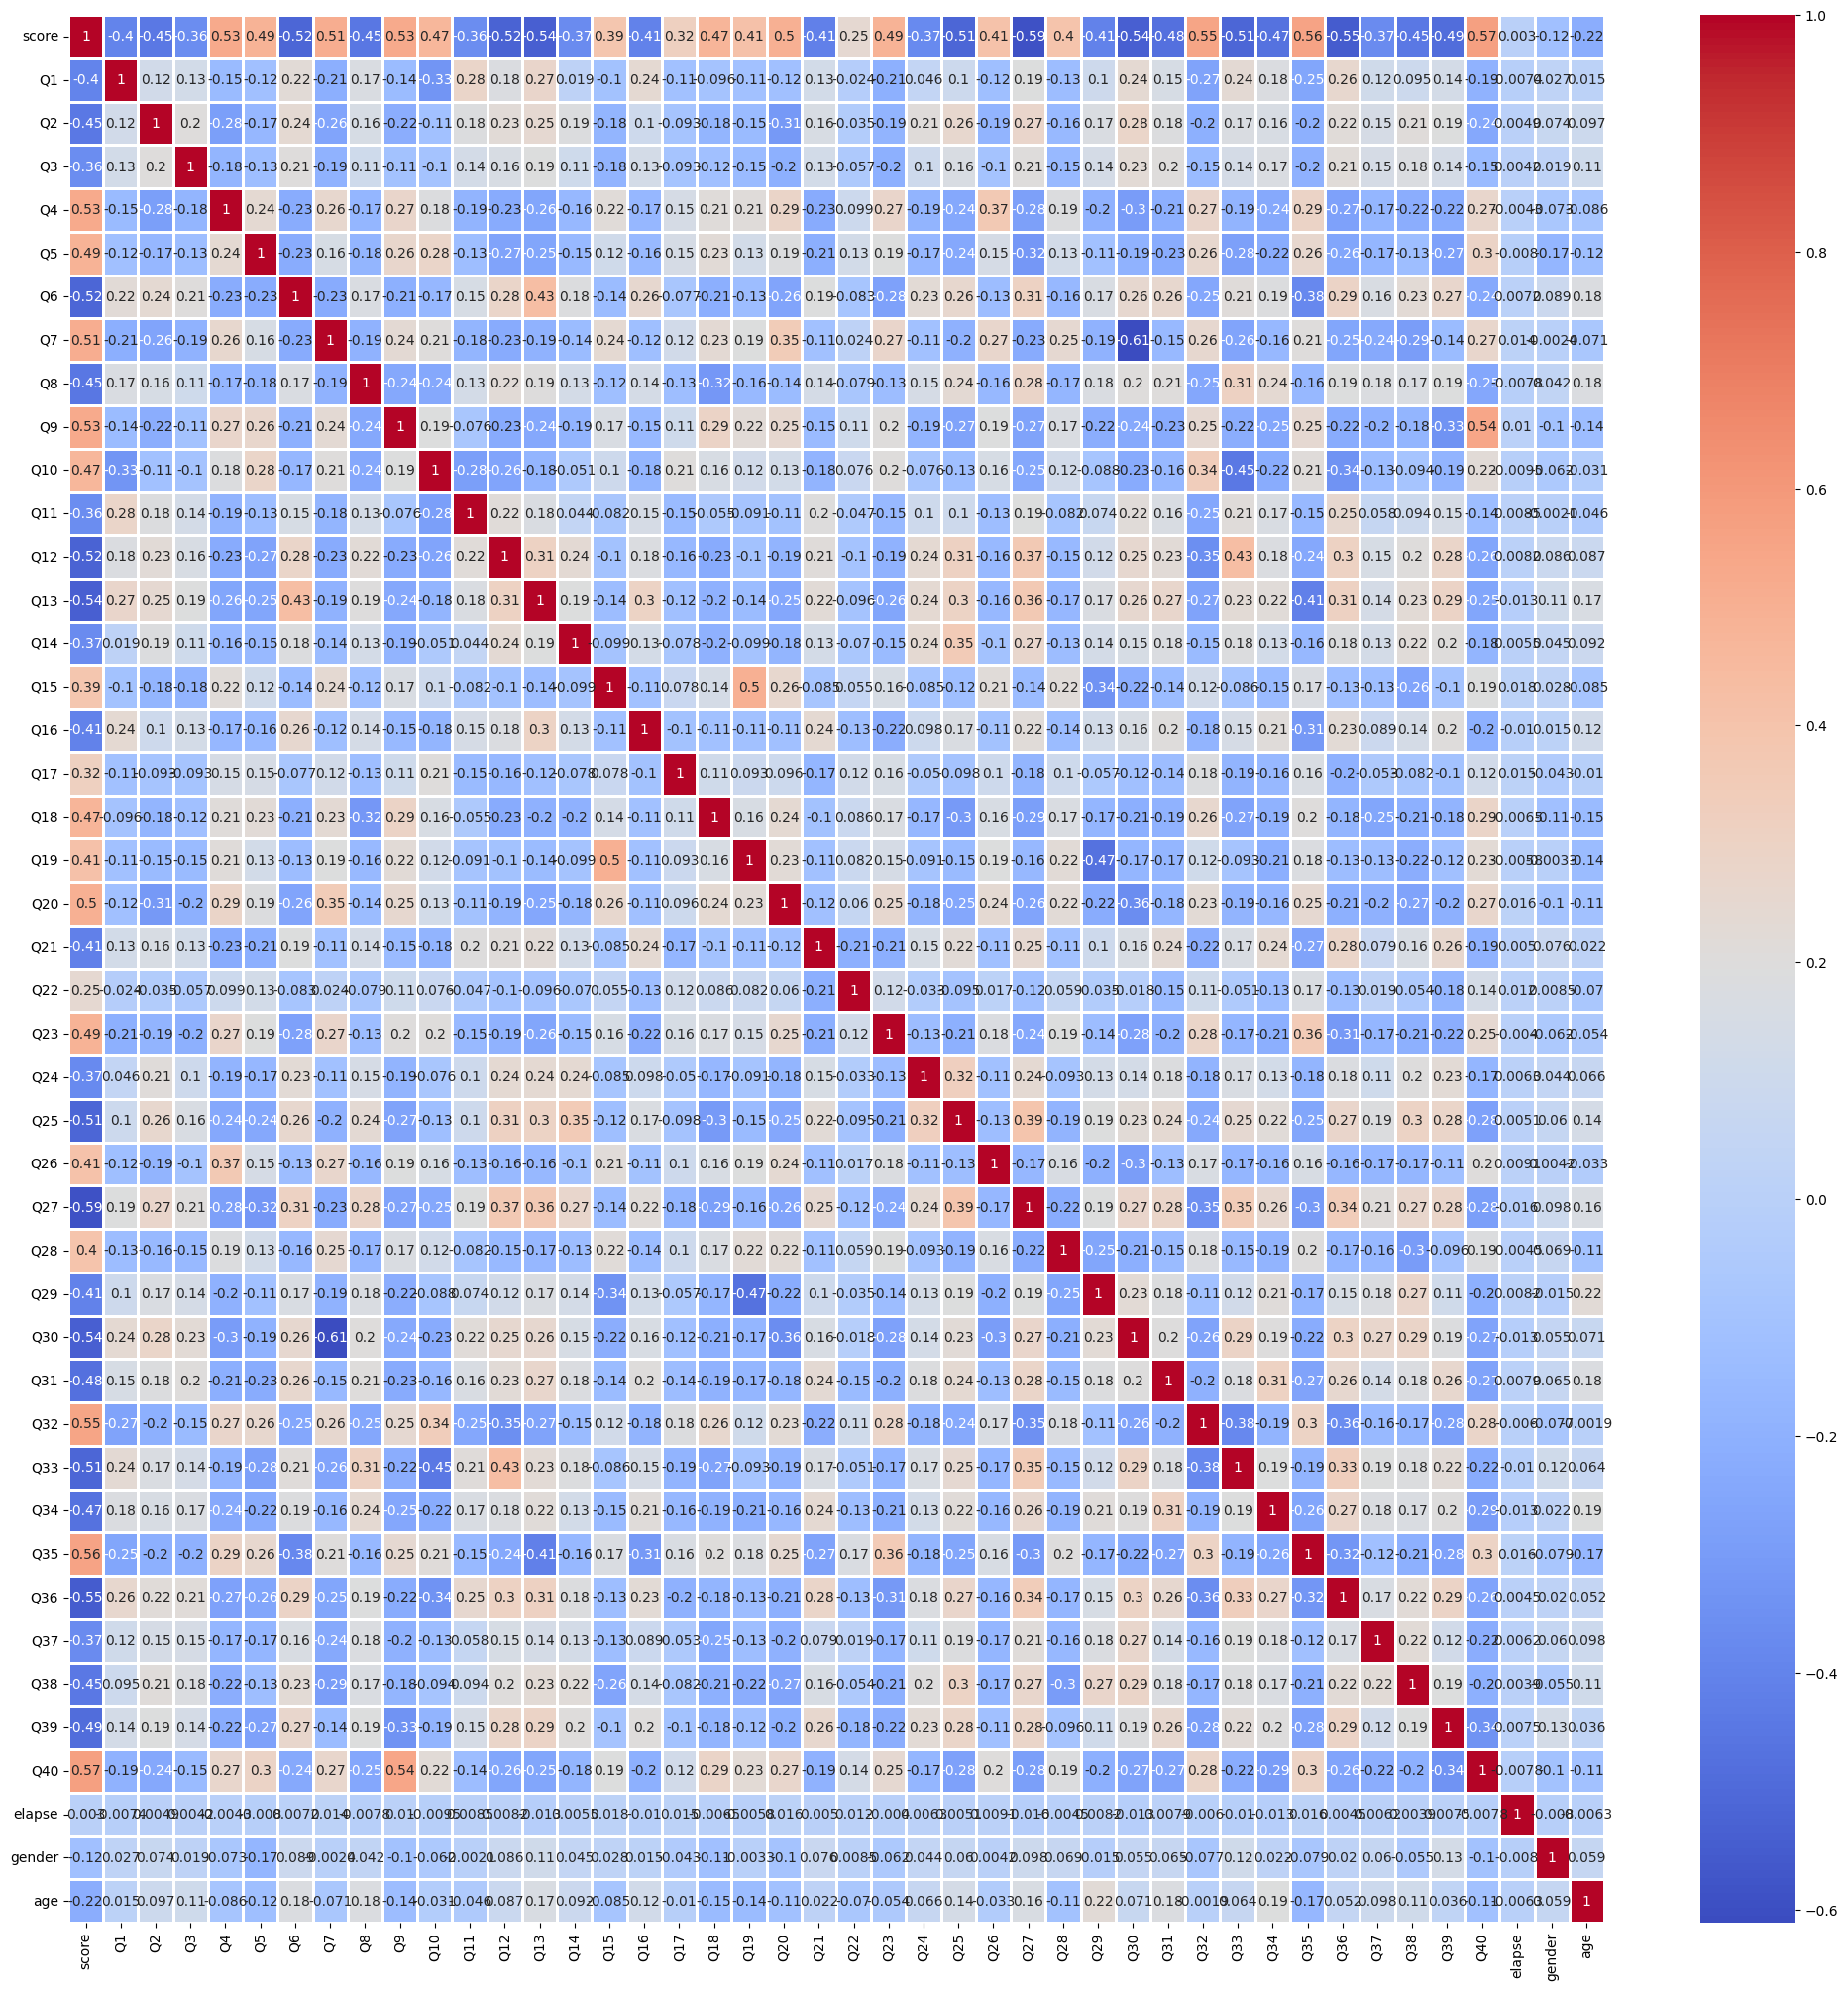

In [10]:
plt.figure(figsize=(25,25))
sns.heatmap(data_corr,
            linewidths=1,
            annot= True,
             cmap = 'coolwarm' )

### Splitting our data into train and test rows using sklearn library

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, score_classified, random_state=42)

In [12]:
rfc = RandomForestClassifier(n_estimators=10,)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [13]:
y_predict = rfc.predict(X_test)

In [14]:
print(classification_report(y_true = y_test, y_pred = y_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2181
           1       0.94      0.80      0.86       630

    accuracy                           0.94      2811
   macro avg       0.94      0.89      0.91      2811
weighted avg       0.94      0.94      0.94      2811



In [15]:
cm = confusion_matrix(y_pred = y_predict, y_true = y_test)

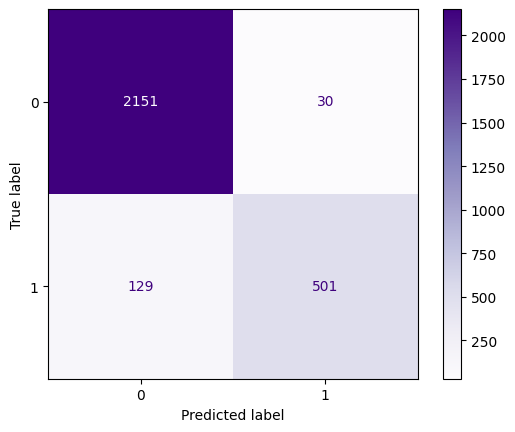

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')

In [17]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [18]:
y_predict_svc = svc.predict(X_test)

In [19]:
print(classification_report(y_pred= y_predict_svc, y_true= y_test, zero_division=1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      2181
           1       1.00      0.00      0.00       630

    accuracy                           0.78      2811
   macro avg       0.89      0.50      0.44      2811
weighted avg       0.83      0.78      0.68      2811



Text(0.5, 1.0, 'SVM Classifier Confusion Matrix')

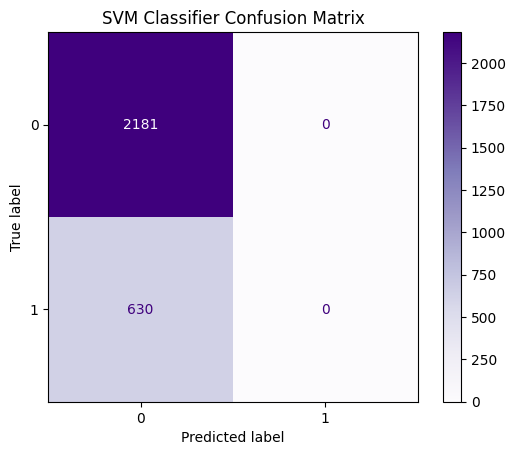

In [20]:
cm_svc = confusion_matrix(y_true= y_test, y_pred = y_predict_svc)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp_svc.plot(cmap='Purples')
plt.title("SVM Classifier Confusion Matrix")

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:

y_predict = rfc.predict(X_test)
print(classification_report(y_pred=y_predict, y_true=y_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2181
           1       0.94      0.80      0.86       630

    accuracy                           0.94      2811
   macro avg       0.94      0.89      0.91      2811
weighted avg       0.94      0.94      0.94      2811



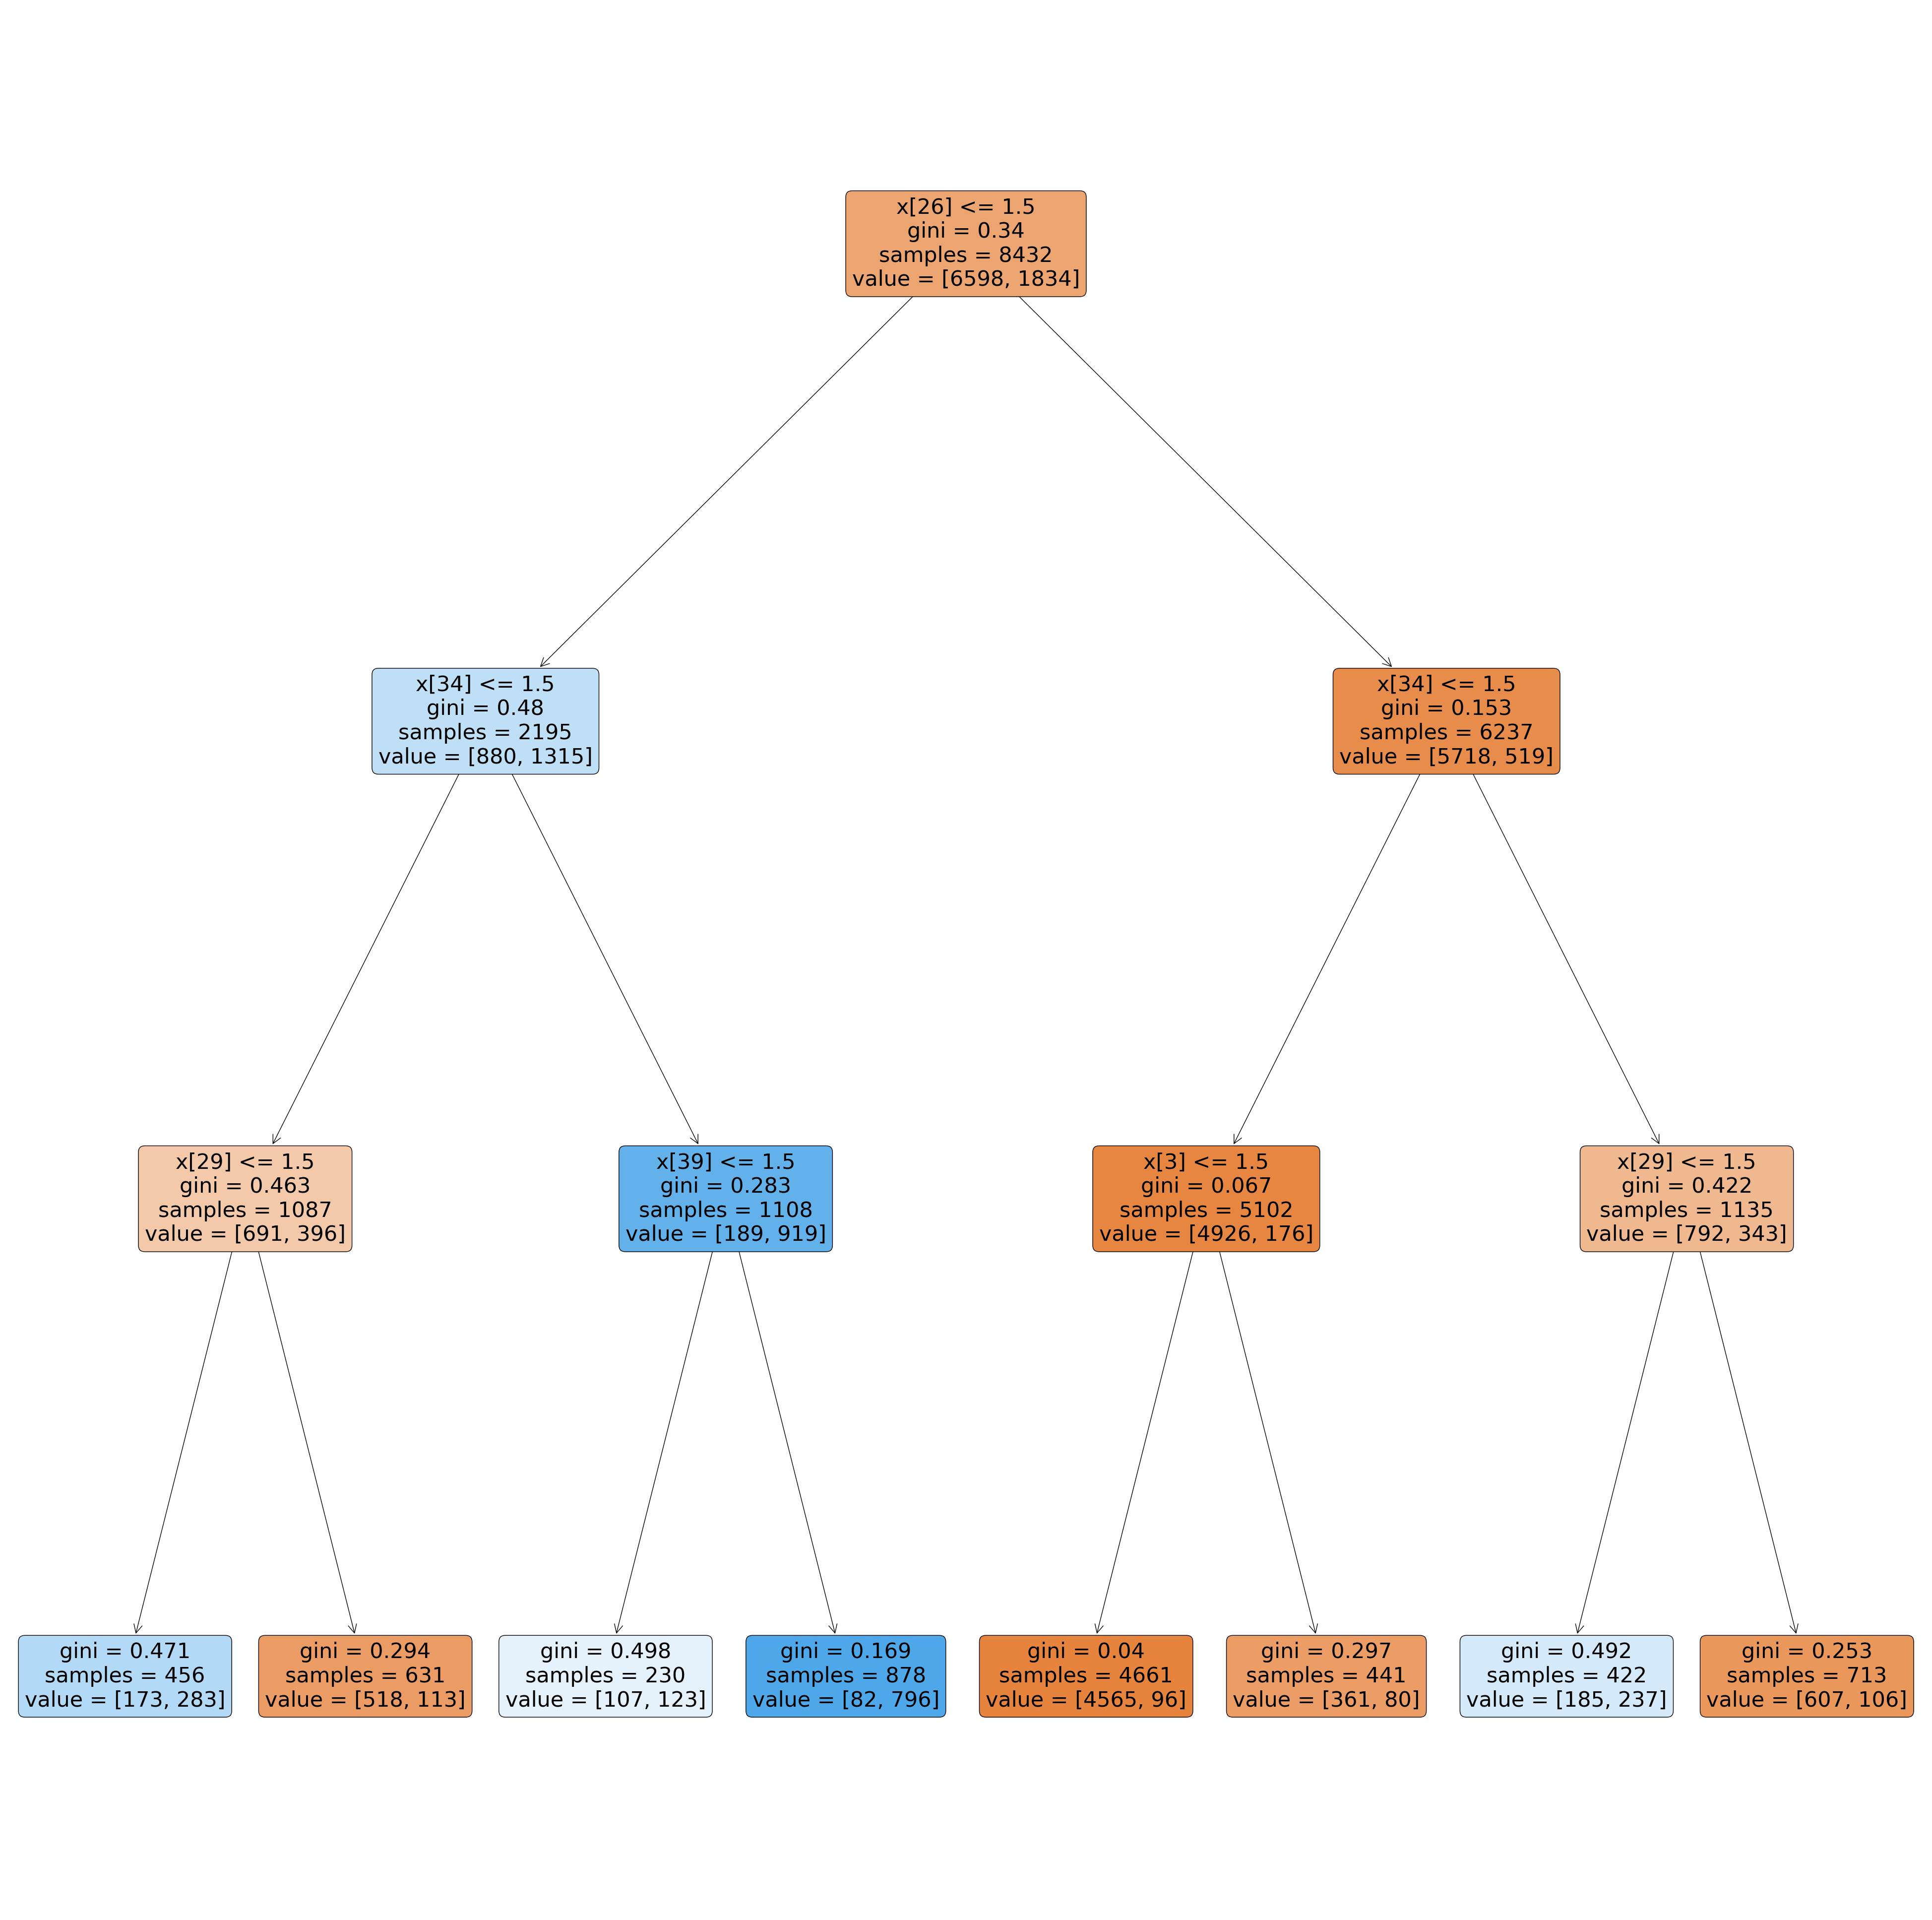

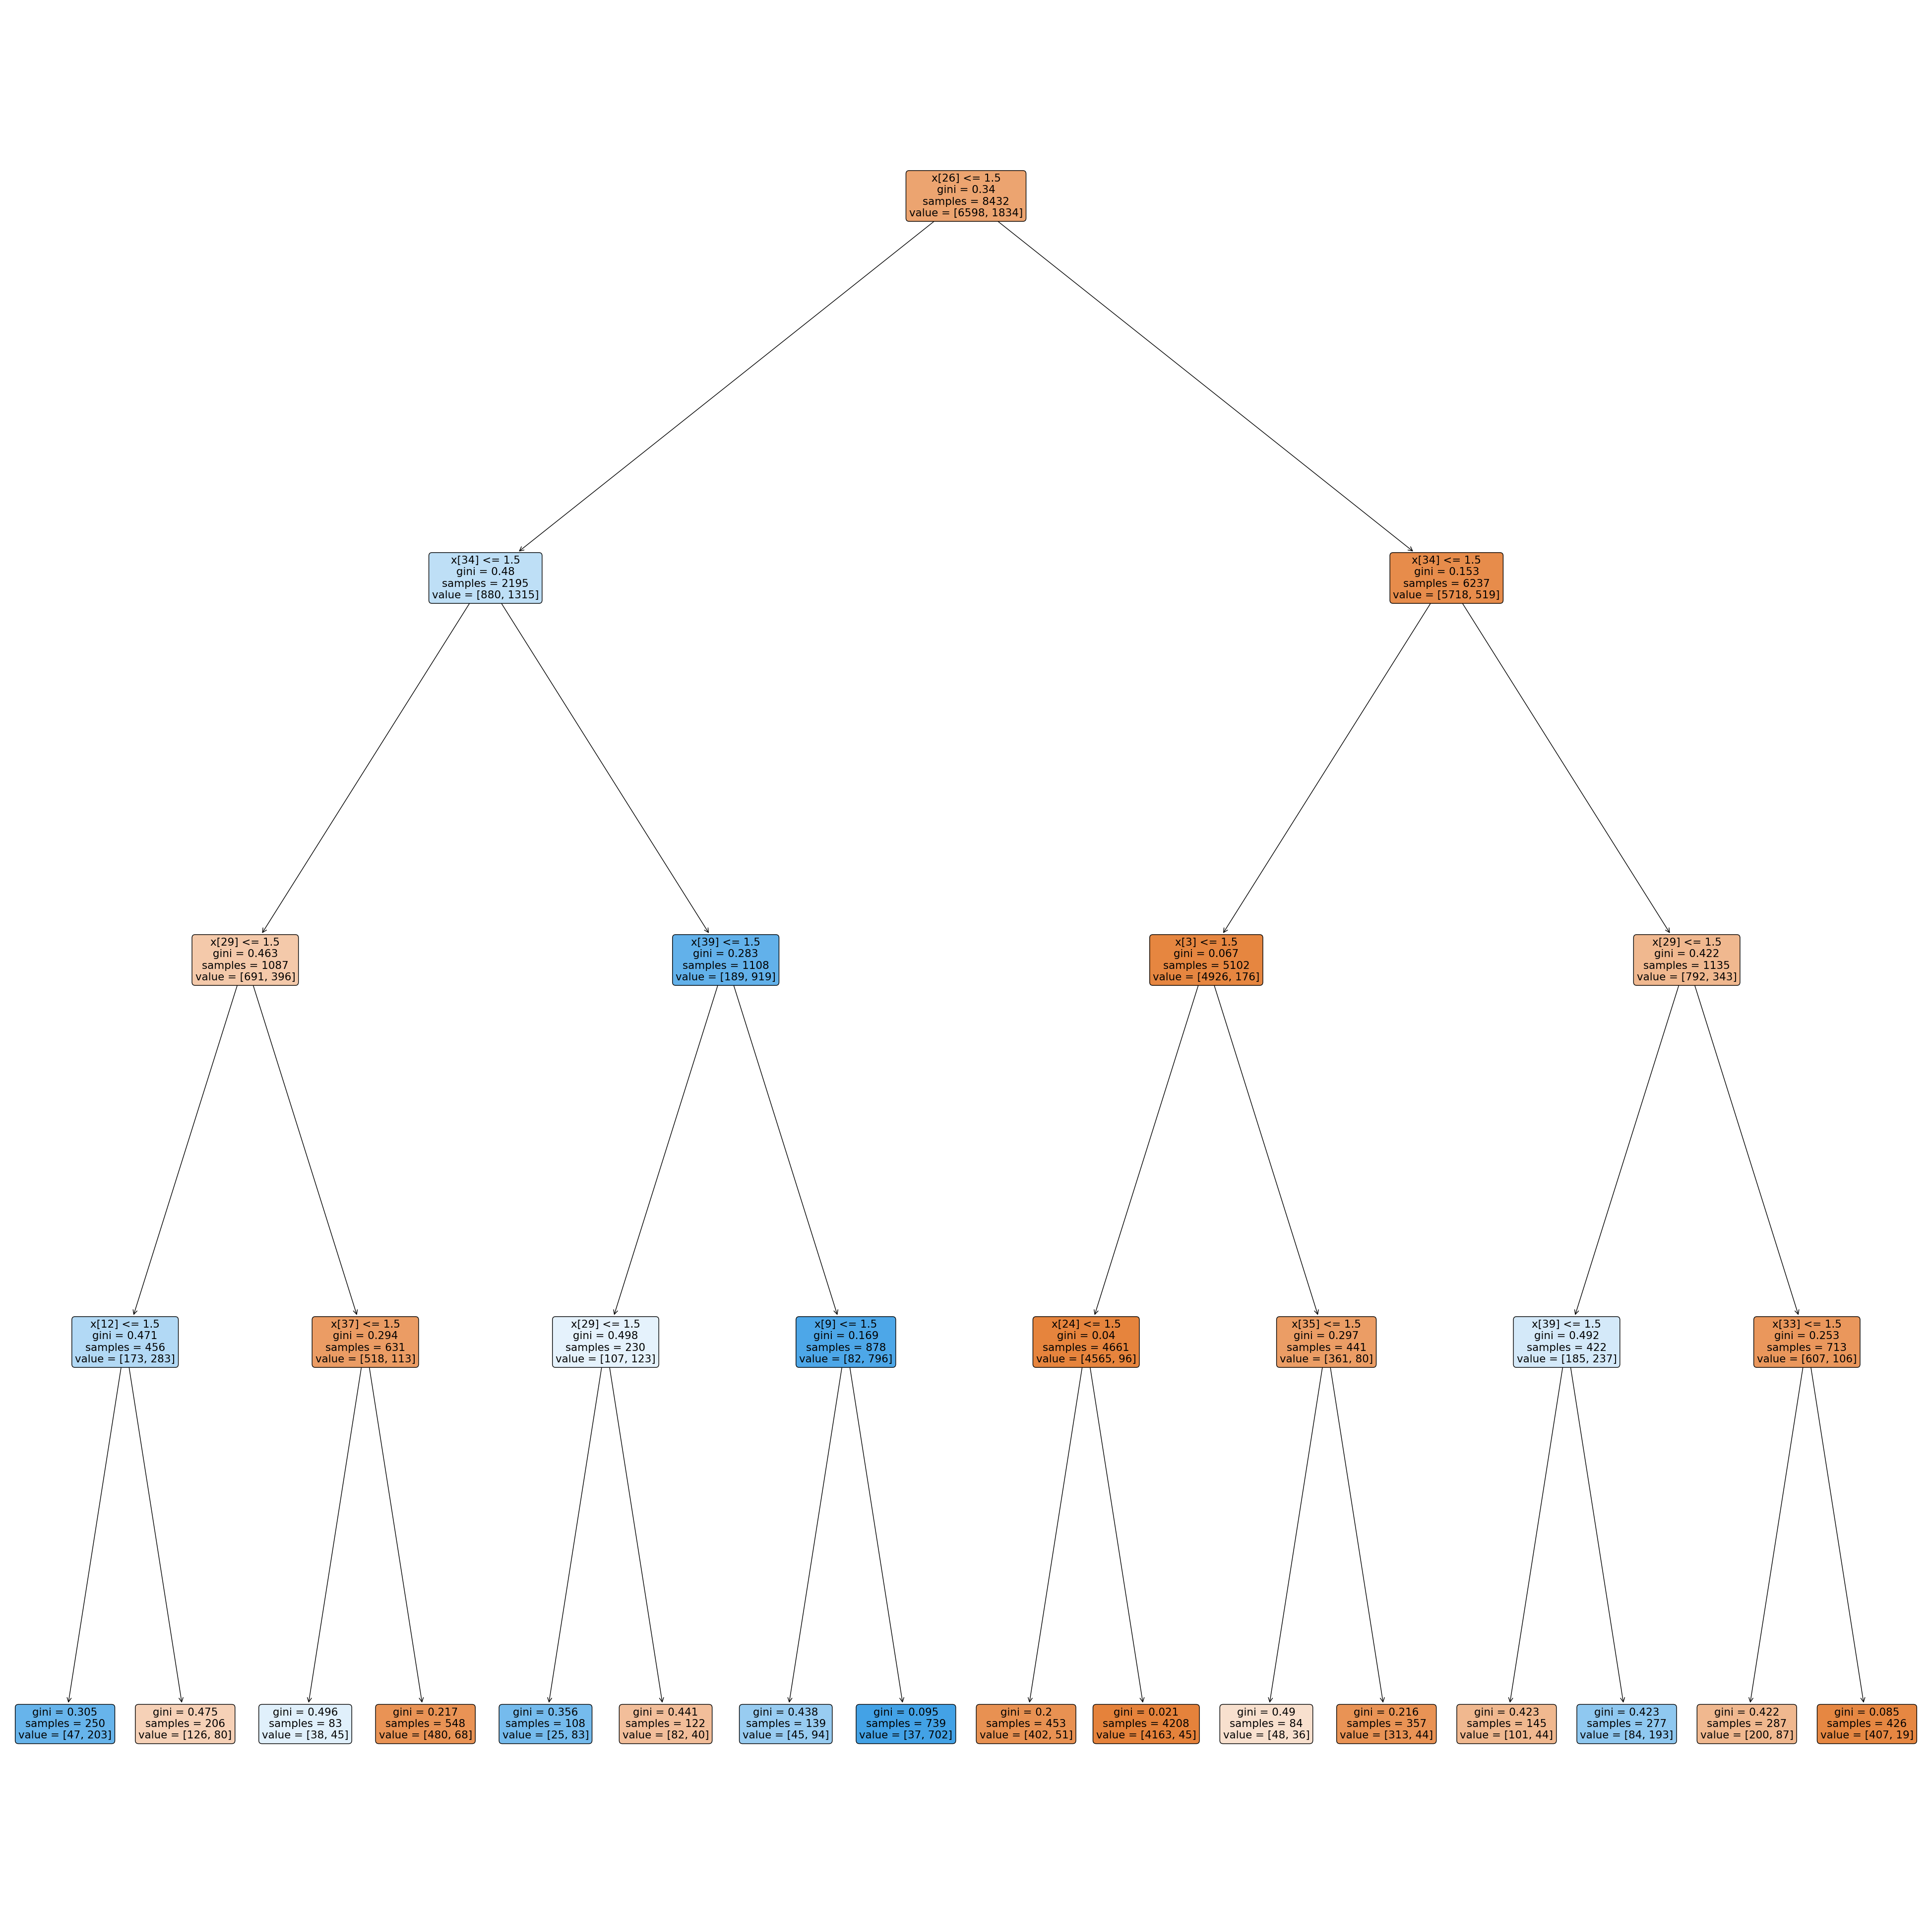

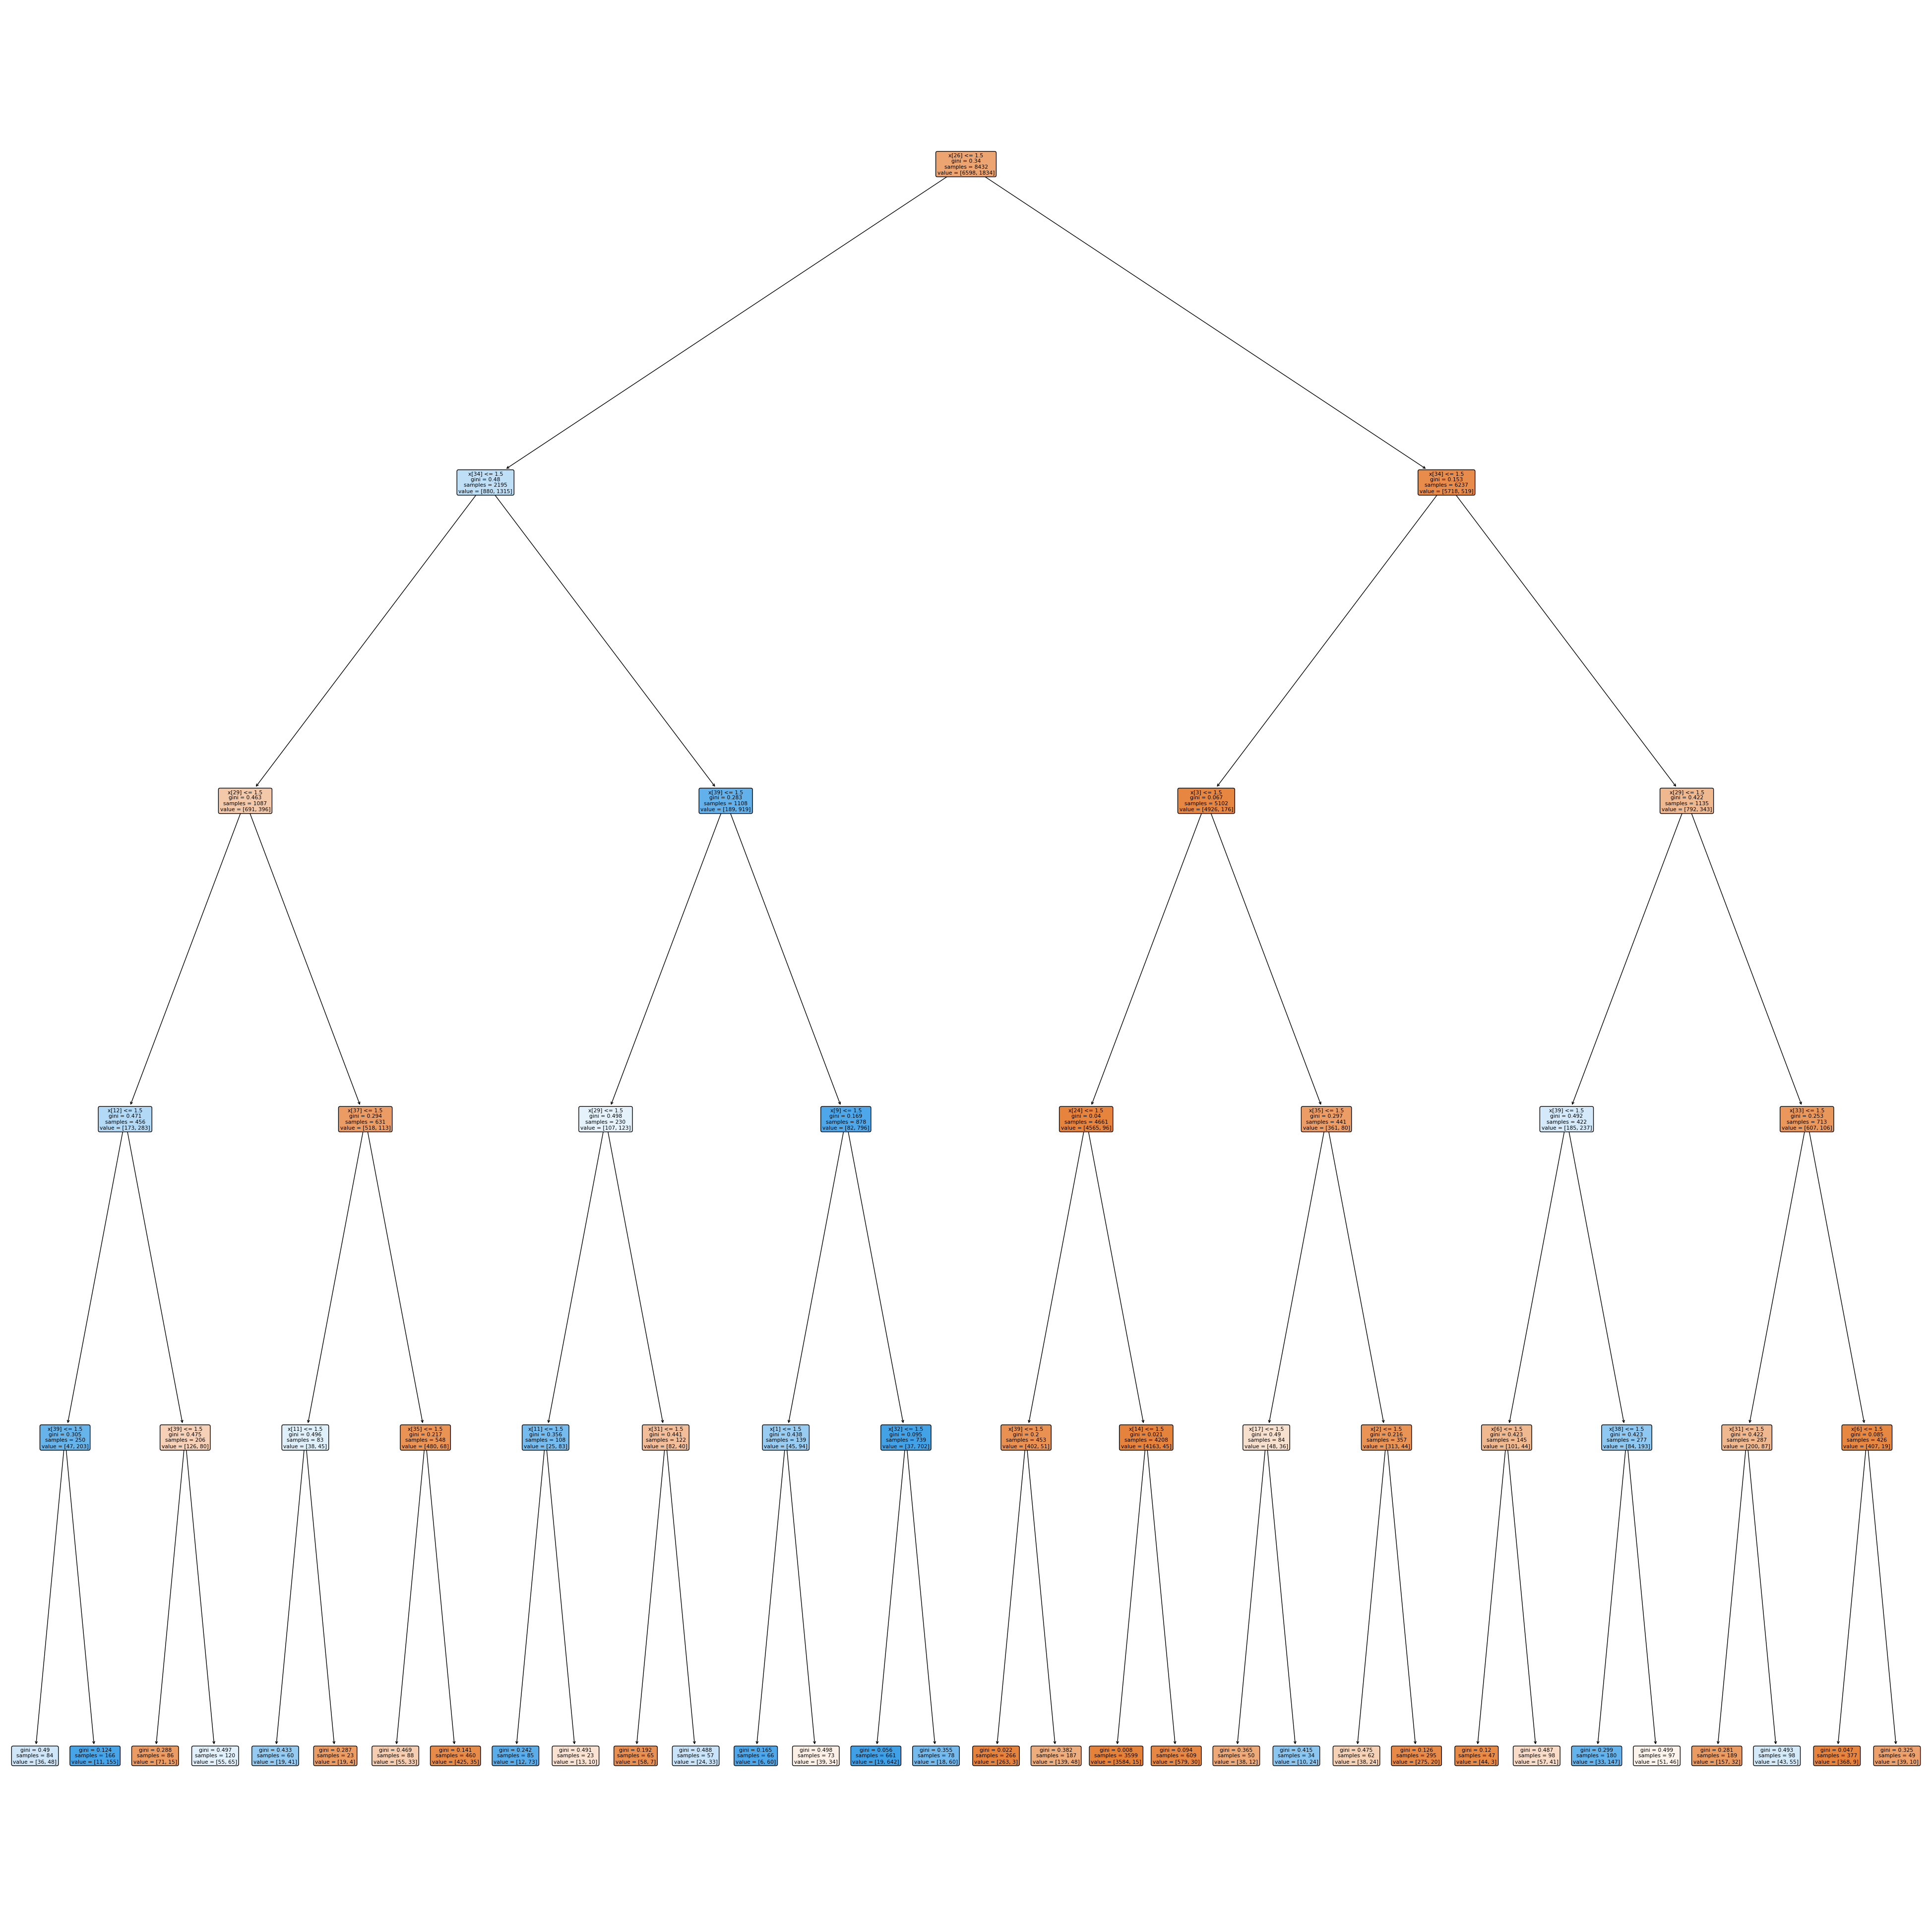

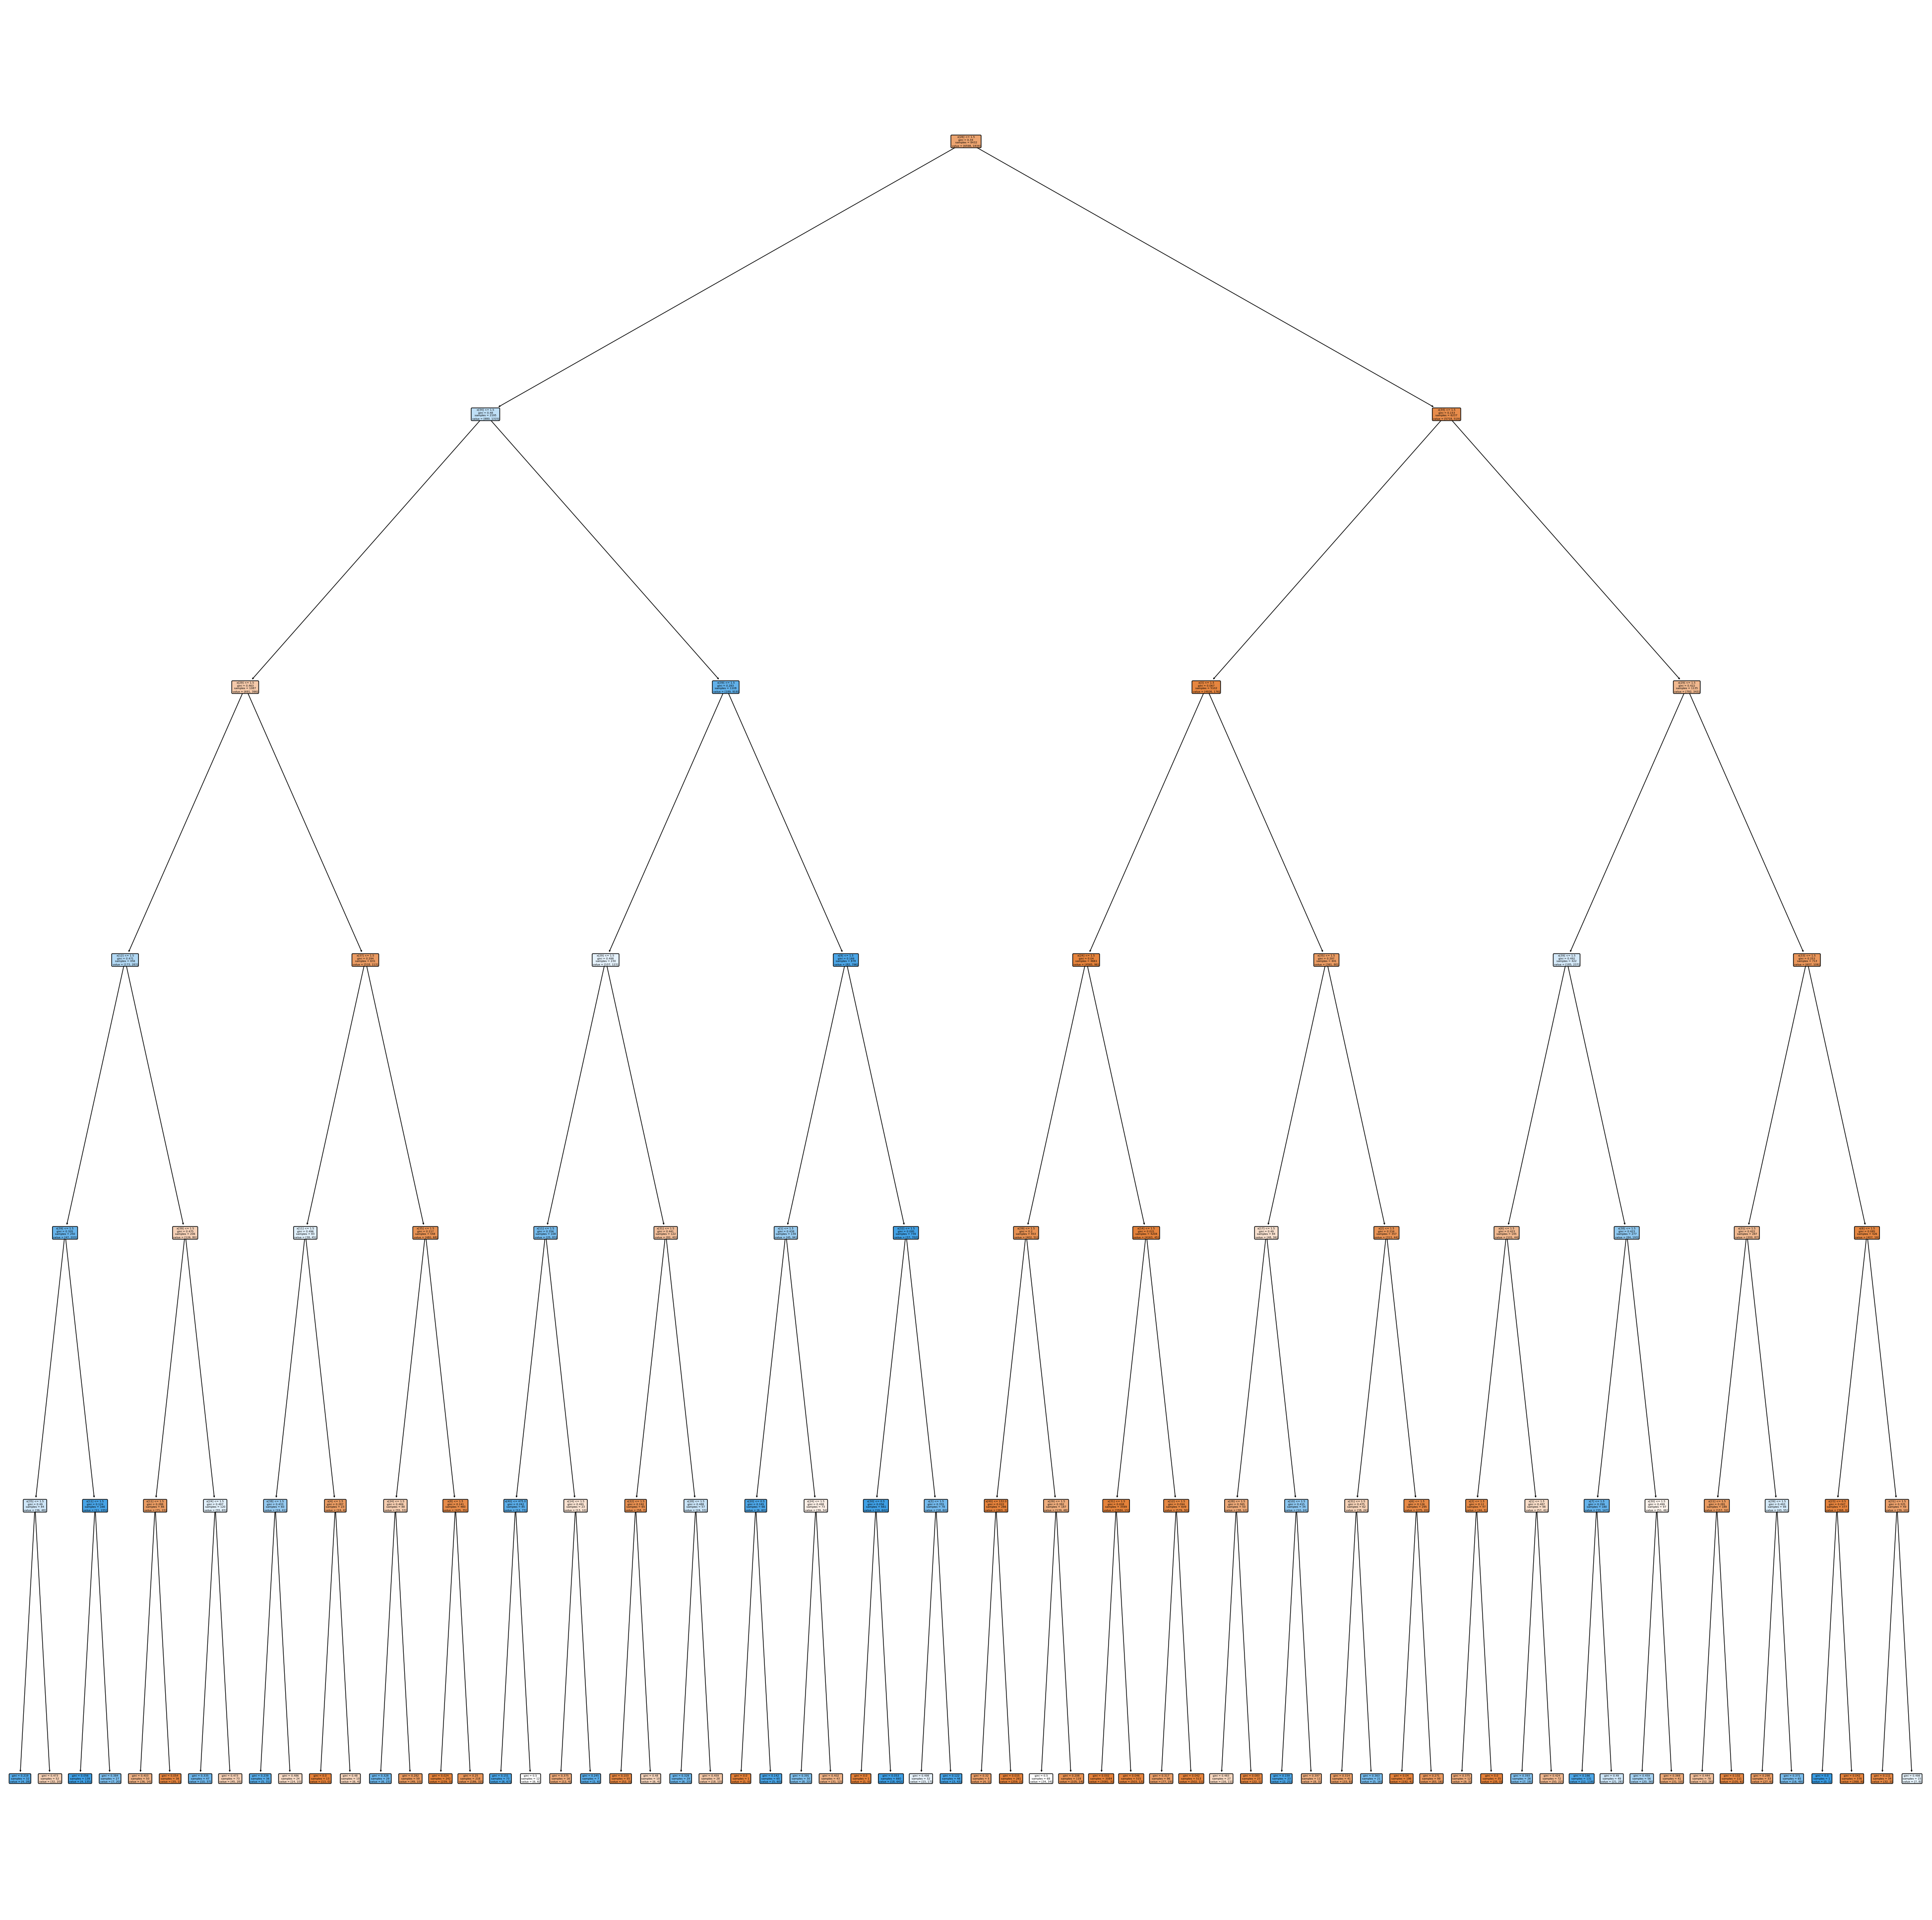

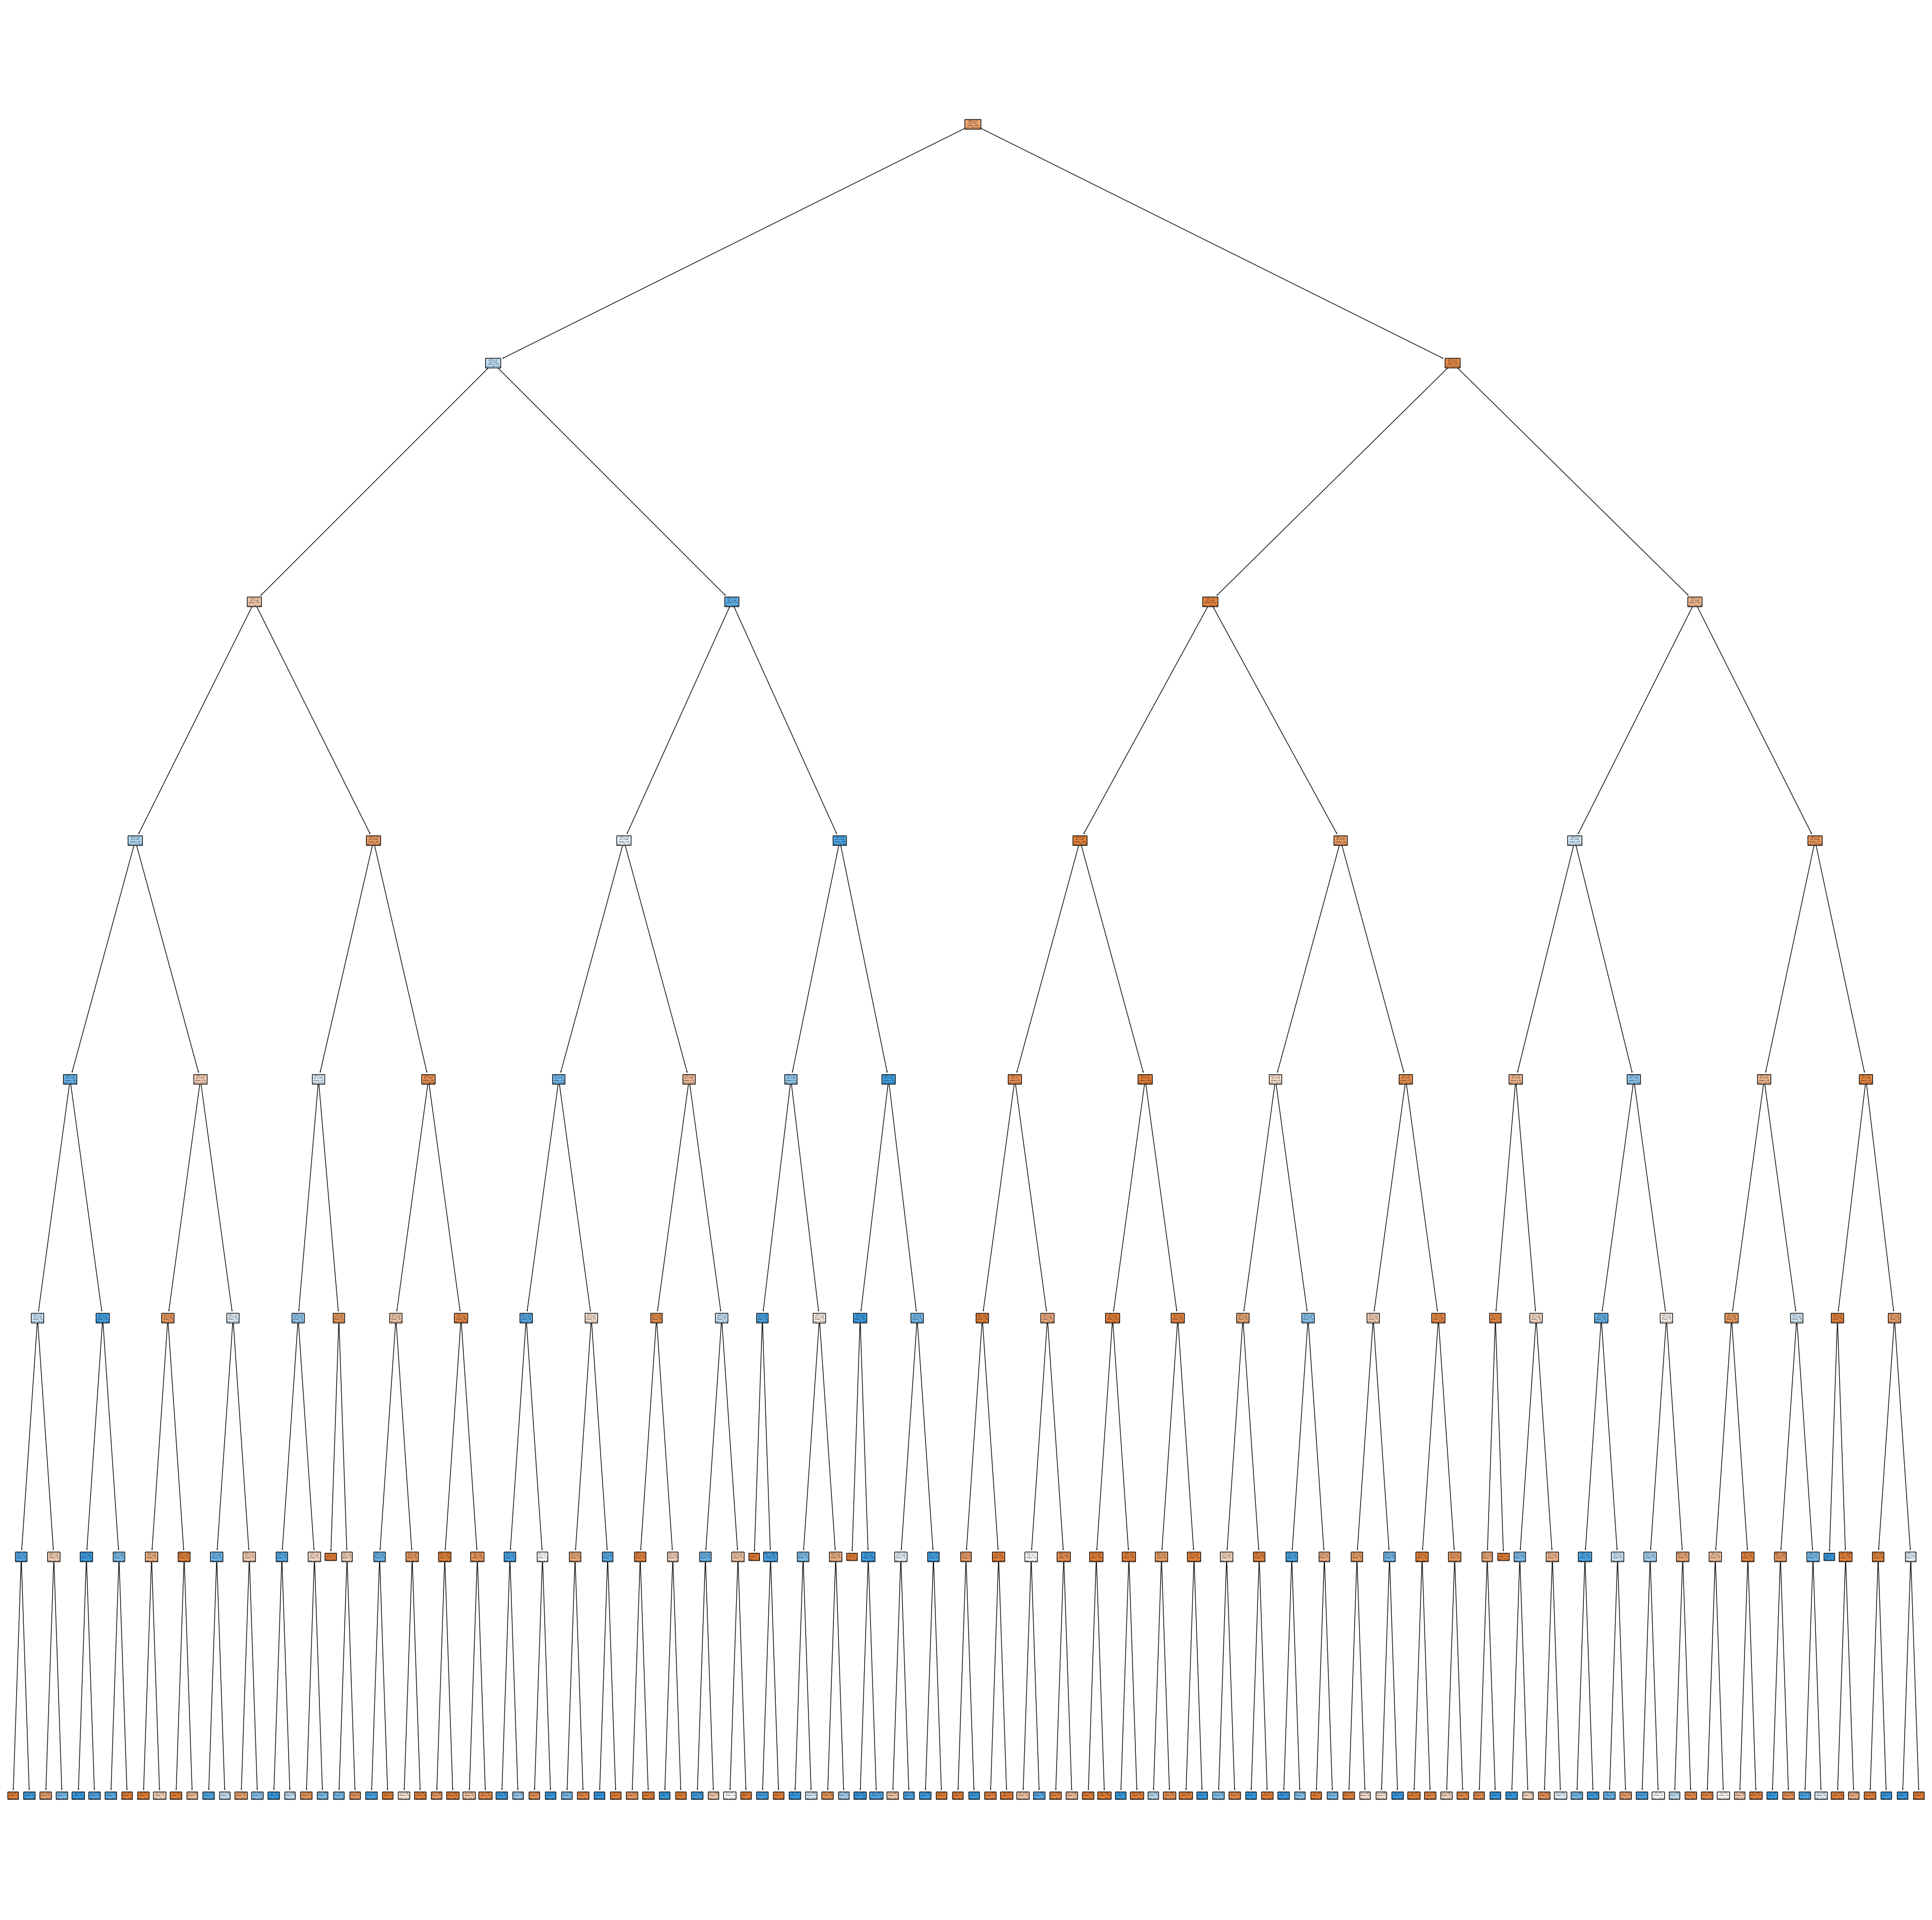

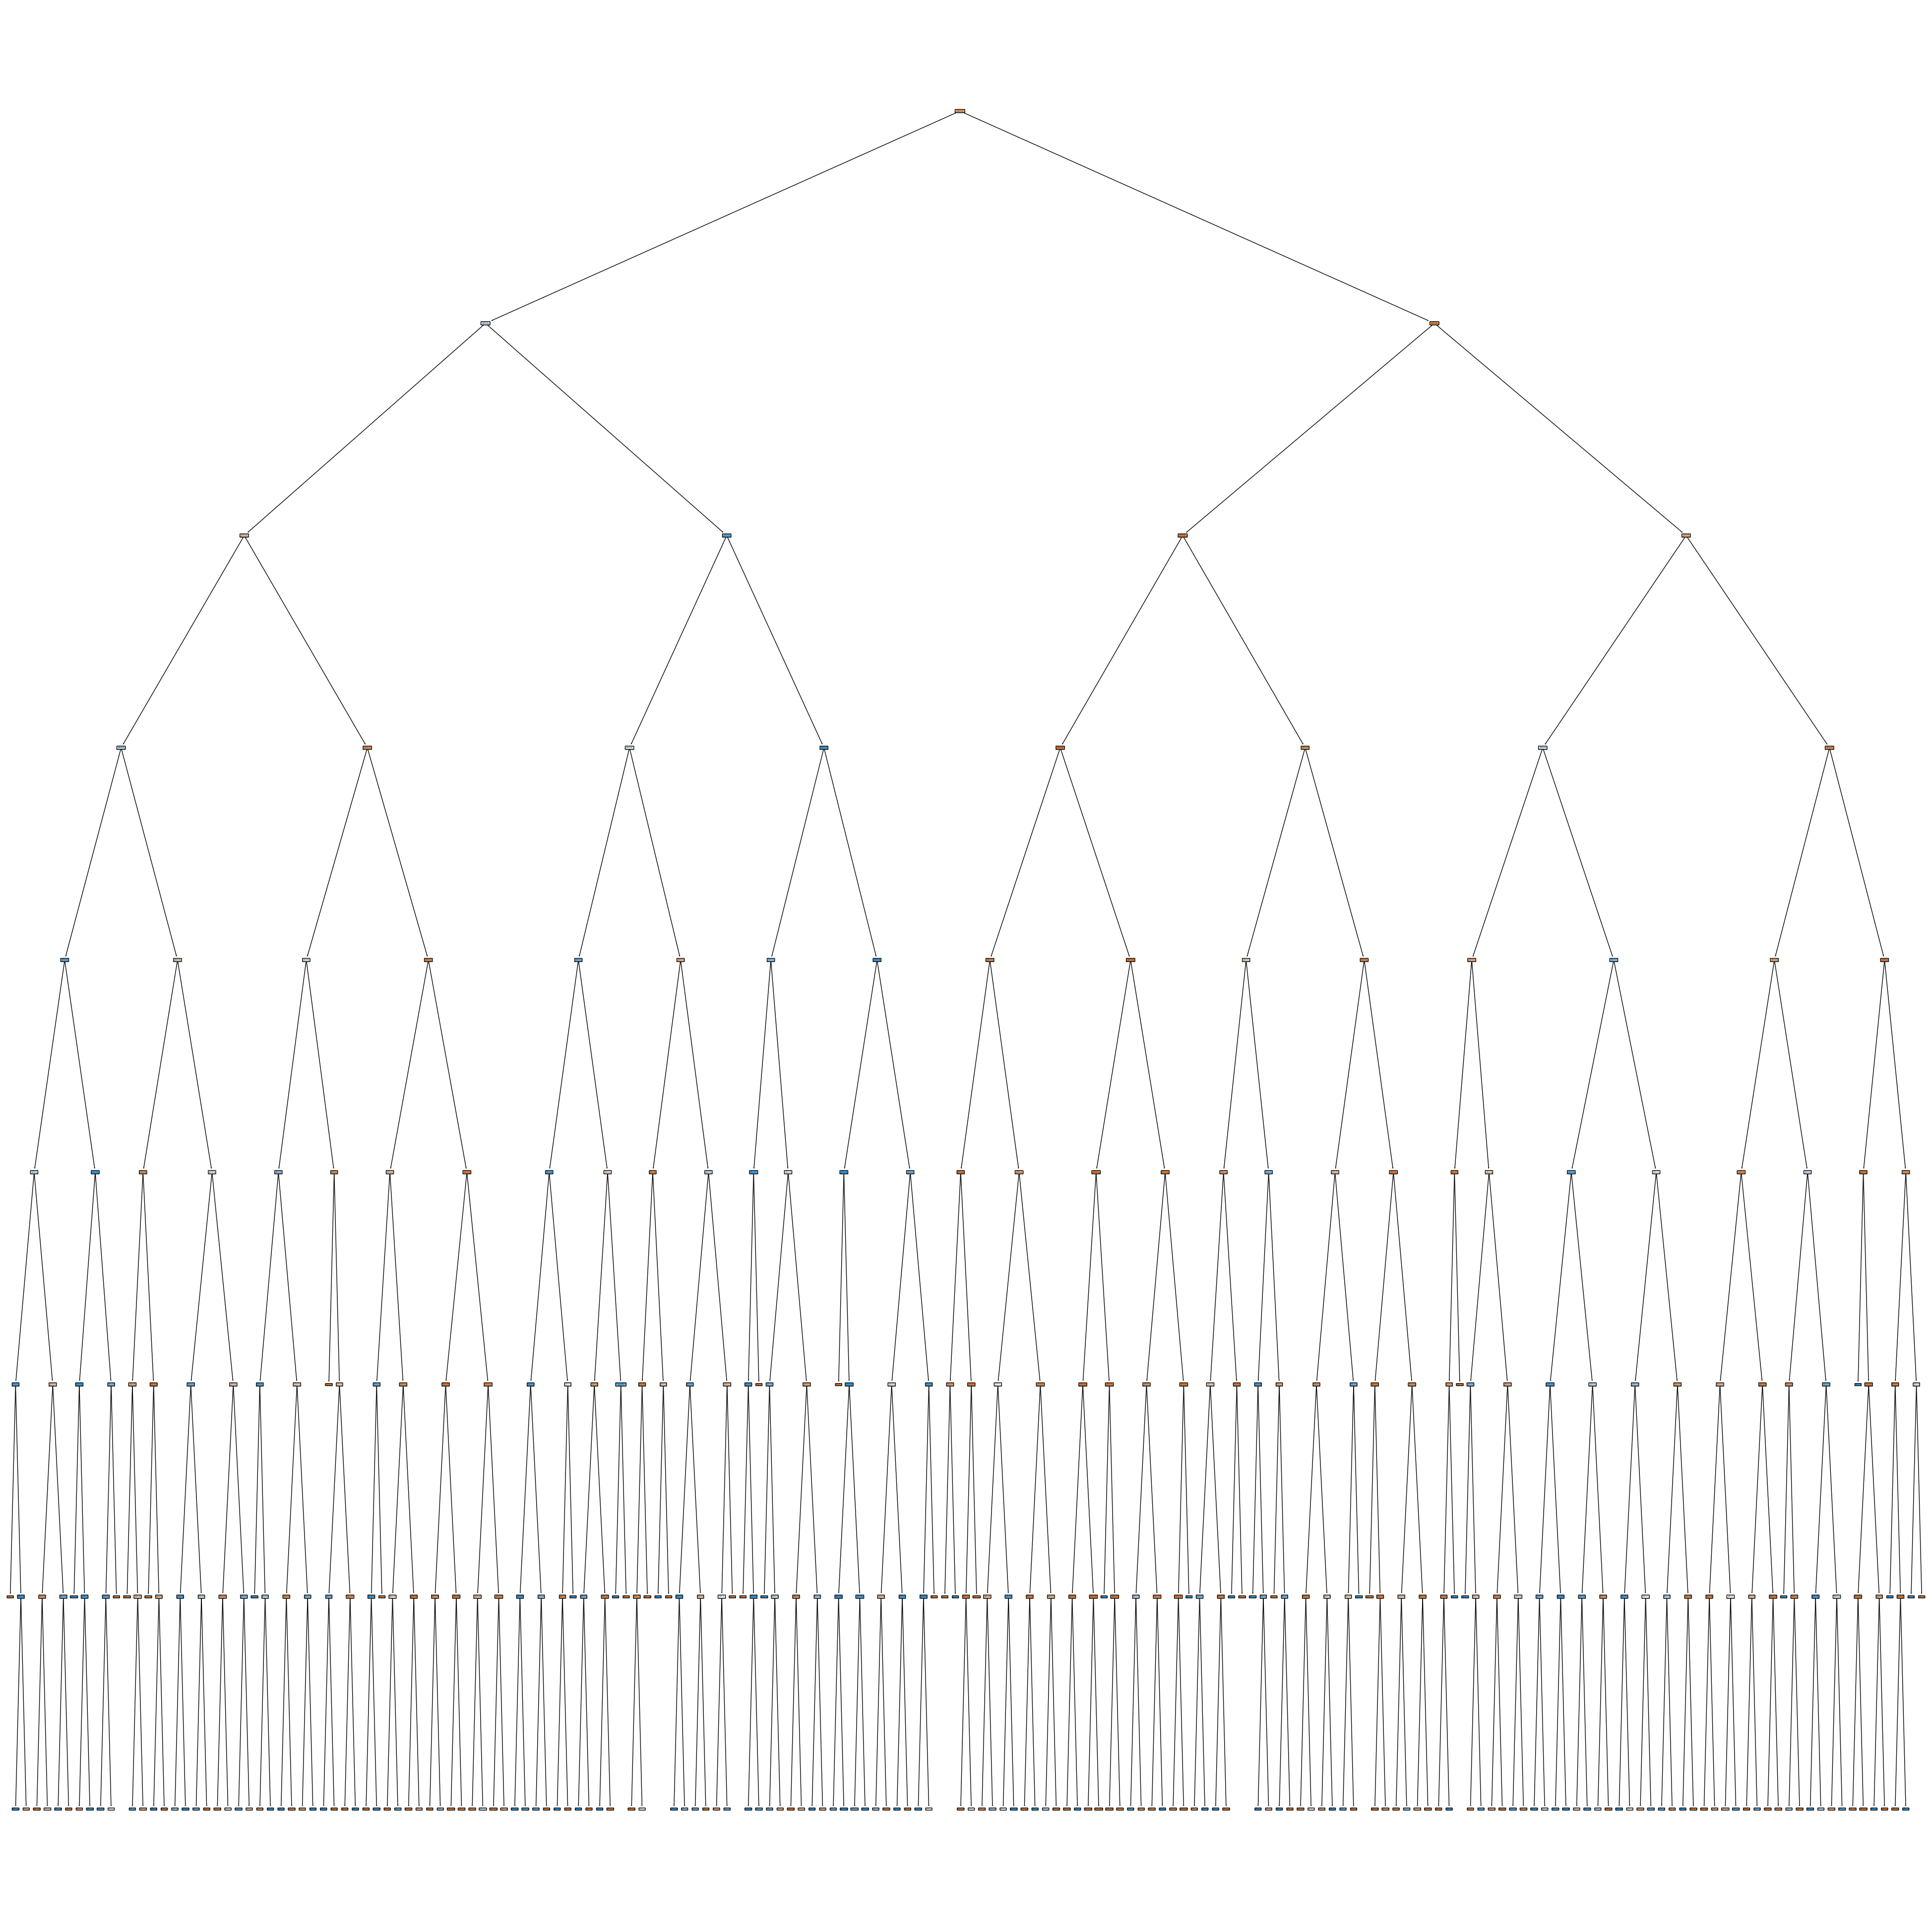

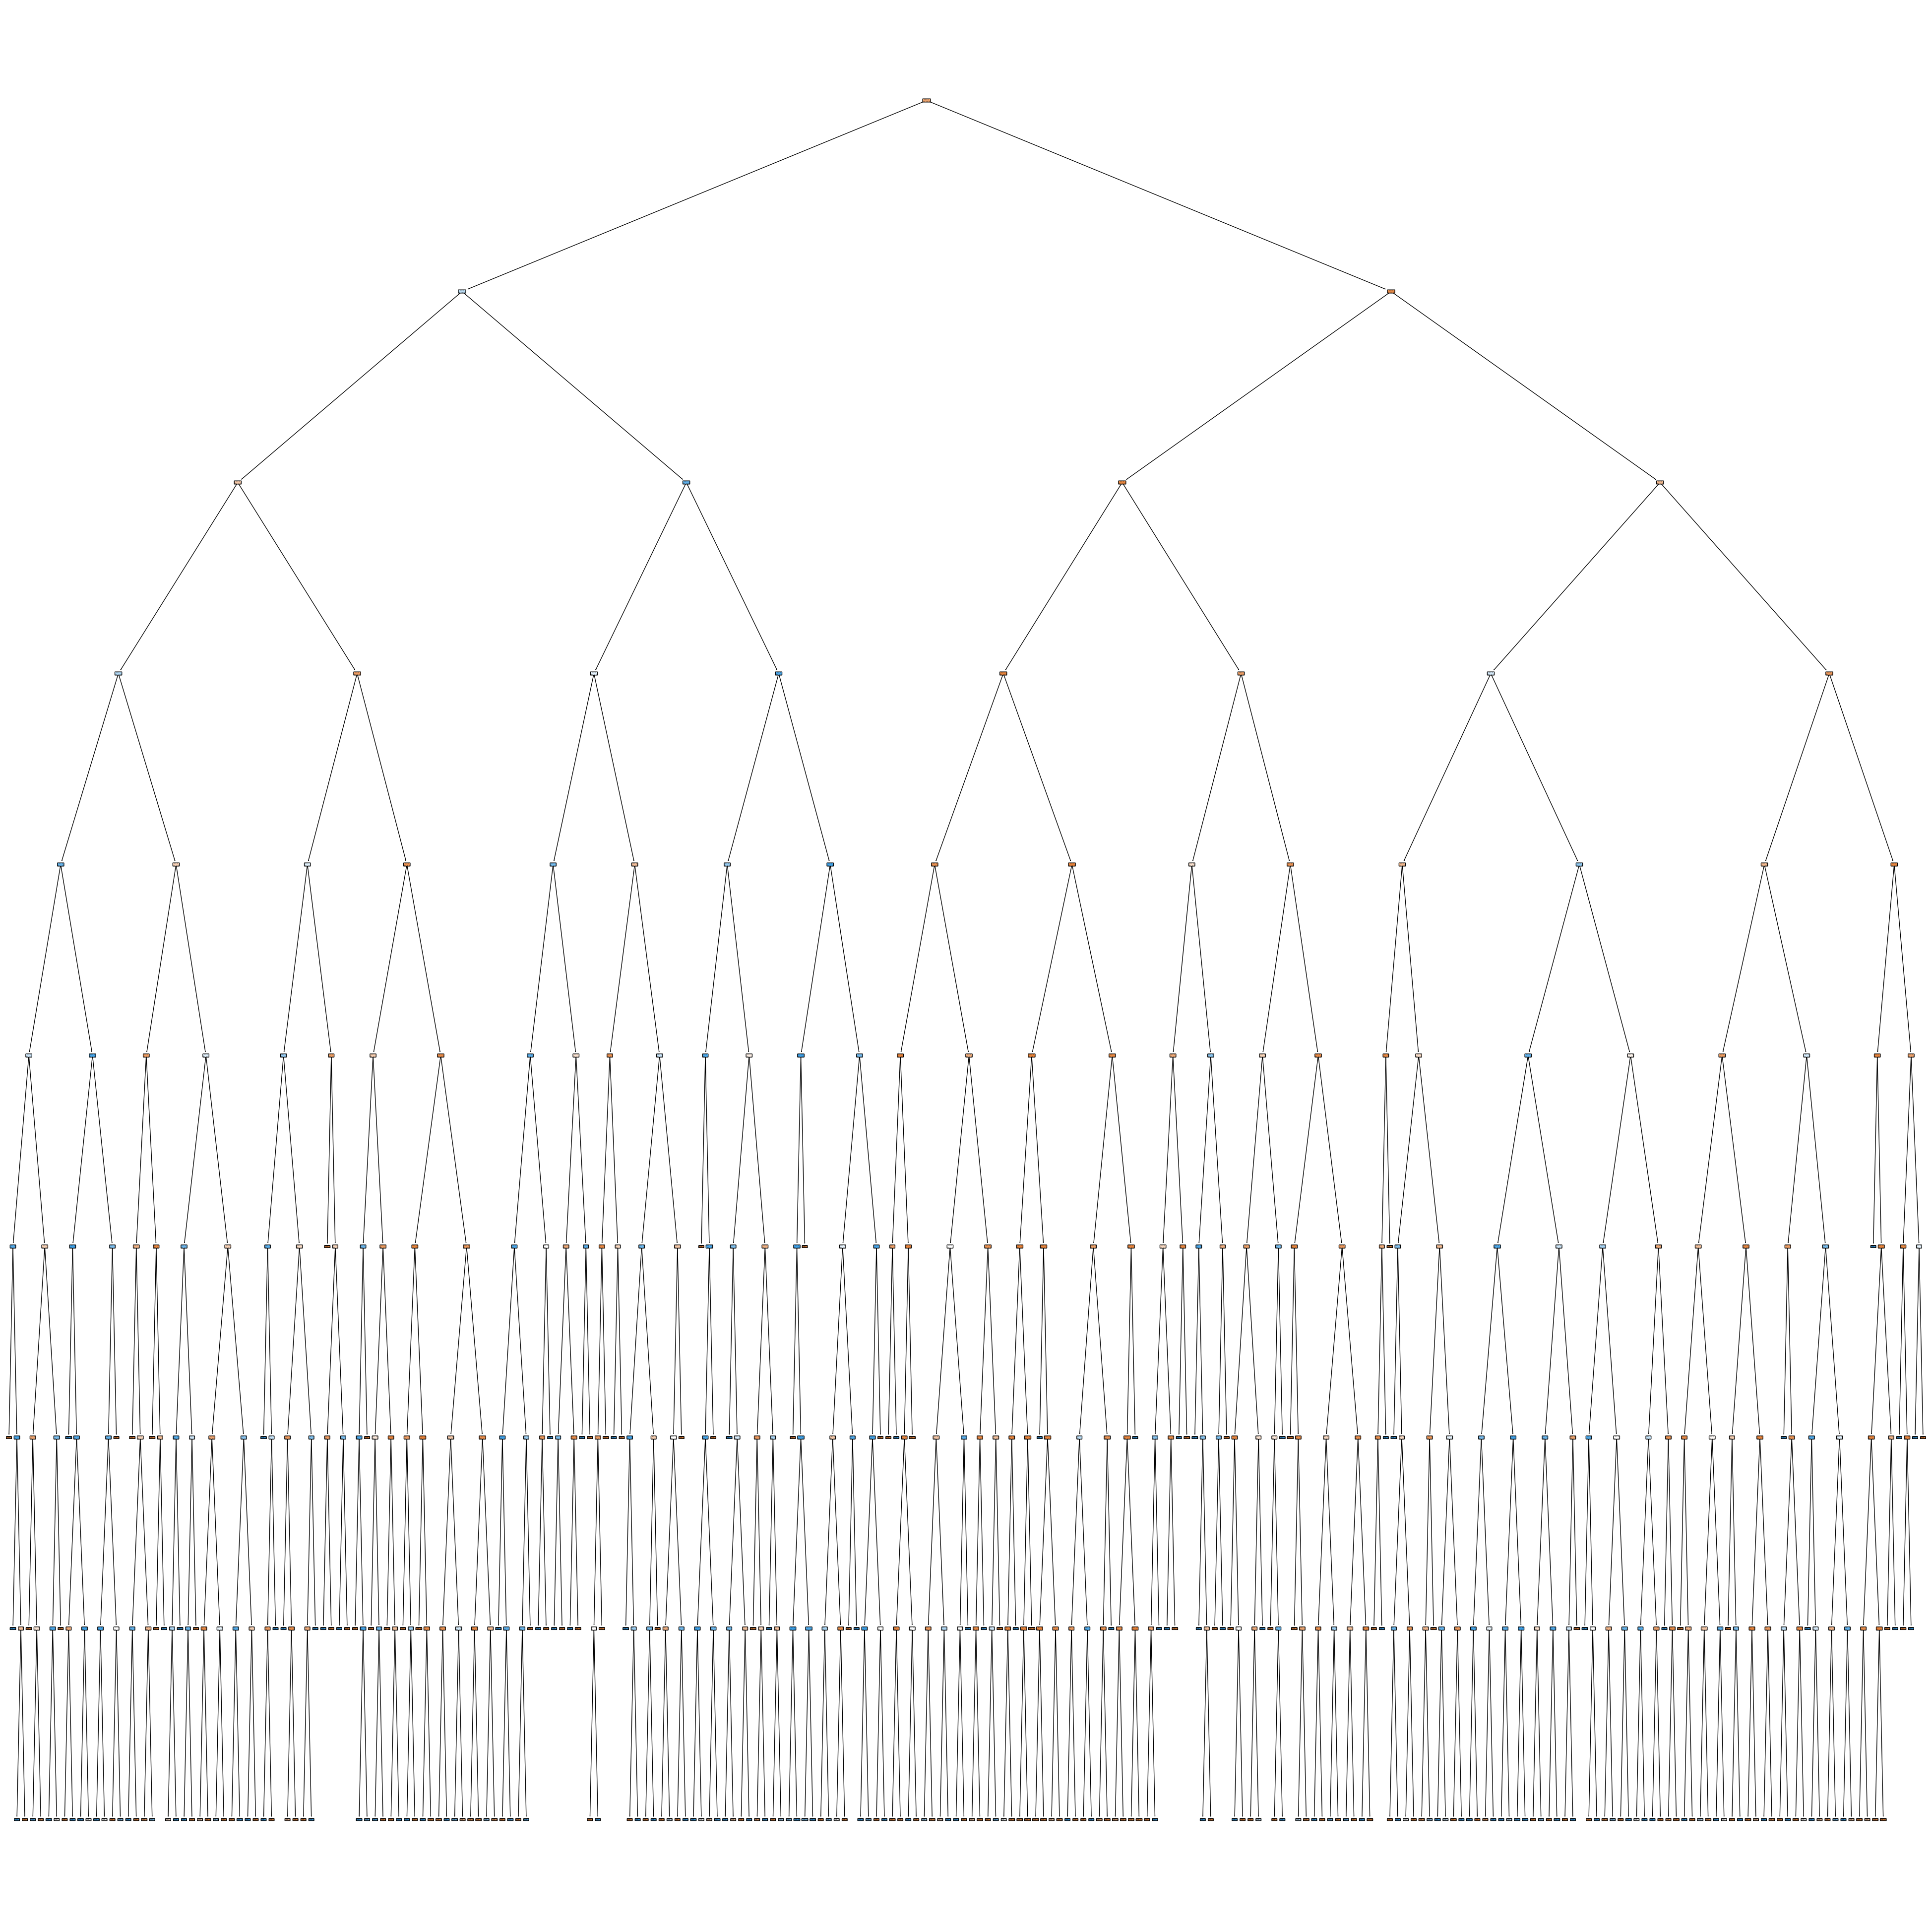

In [23]:
for i in range(3,10):
    dtc = DecisionTreeClassifier(random_state=42, max_depth=i)
    dtc.fit(X_train, y_train)
    plt.figure(figsize=(50,50))
    plot_tree(dtc,
          filled=True,
          rounded=True,)
    plt.savefig(f'tree_high_dpi{i}', dpi = 500)